# Data Understanding

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

DATA_PATH = "../input/indonesia-tourism-destination"

info_tourism = pd.read_csv(f"{DATA_PATH}/tourism_with_id.csv")
tourism_rating = pd.read_csv(f"{DATA_PATH}/tourism_rating.csv")
users = pd.read_csv(f"{DATA_PATH}/user.csv")

In [2]:
info_tourism.sample(5)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
411,412,Masjid Nasional Al-Akbar,Masjid Nasional Al Akbar (atau biasa disebut M...,Tempat Ibadah,Surabaya,0,4.9,NaN,"{'lat': -7.336614099999998, 'lng': 112.7151806}",-7.336614,112.715181,NaN,412
14,15,Pasar Seni,Pasar Seni merupakan Pusat kerajinan dan kesen...,Pusat Perbelanjaan,Jakarta,0,4.4,90.0,"{'lat': -6.1766868, 'lng': 106.8417666}",-6.176687,106.841767,NaN,15
278,279,Masjid Agung Trans Studio Bandung,Masjid Agung Trans Studio Bandung (TSB) berdir...,Tempat Ibadah,Bandung,0,4.8,NaN,"{'lat': -6.925963500000001, 'lng': 107.6354278}",-6.925963,107.635428,NaN,279
356,357,Wisata Alam Wana Wisata Penggaron,Berada sekitar 2 KM dari Kota Ungaran atau sek...,Cagar Alam,Semarang,10000,4.1,45.0,"{'lat': -7.115796899999999, 'lng': 110.4217966}",-7.115797,110.421797,NaN,357
346,347,Taman Pandanaran,"Dalam sejarah yang tercatat, dulunya tempat in...",Taman Hiburan,Semarang,0,4.4,45.0,"{'lat': -6.987793600000001, 'lng': 110.4172262}",-6.987794,110.417226,NaN,347


In [3]:
tourism_rating.sample(5)

,User_Id,Place_Id,Place_Ratings
7484,225,239,3
916,29,104,3
9464,285,222,5
1518,47,314,3
8514,257,433,3


In [4]:
users.sample(5)

,User_Id,Location,Age
203,204,"Jakarta Selatan, DKI Jakarta",21
64,65,"Yogyakarta, DIY",22
94,95,"Subang, Jawa Barat",27
192,193,"Jakarta Utara, DKI Jakarta",20
99,100,"Bogor, Jawa Barat",28


In [5]:
print(f"Number of places in the datasets : {len(info_tourism.Place_Id.unique())}")
print(f"Number of users : {len(users.User_Id.unique())}")
print(f"The number of ratings given by the user to the dataset : {len(tourism_rating.User_Id)}")

Number of places in the datasets : 437
Number of users : 300
The number of ratings given by the user to the dataset : 10000


# Exploratory Data Analysis

In [6]:
info_tourism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB


In [7]:
info_tourism.isnull().sum()

Place_Id          0
Place_Name        0
Description       0
Category          0
City              0
Price             0
Rating            0
Time_Minutes    232
Coordinate        0
Lat               0
Long              0
Unnamed: 11     437
Unnamed: 12       0
dtype: int64

In [8]:
tourism_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


In [9]:
tourism_rating.isnull().sum()

User_Id          0
Place_Id         0
Place_Ratings    0
dtype: int64

In [10]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User_Id   300 non-null    int64 
 1   Location  300 non-null    object
 2   Age       300 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.2+ KB


In [11]:
users.isnull().sum()

User_Id     0
Location    0
Age         0
dtype: int64

In [12]:
info_tourism.Category.unique()

array(['Budaya', 'Taman Hiburan', 'Cagar Alam', 'Bahari',
       'Pusat Perbelanjaan', 'Tempat Ibadah'], dtype=object)

# Data Preprocessing

In [13]:
import numpy as np

tourism_all = np.concatenate((
    info_tourism.Place_Id.unique(),
    tourism_rating.Place_Id.unique()
))

tourism_all = np.sort(np.unique(tourism_all))

print(f"Total number of tourism: {len(tourism_all)}")

Total number of tourism: 437


In [14]:
all_tourism_rate = tourism_rating
all_tourism_rate

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4
...,...,...,...
9995,300,425,2
9996,300,64,4
9997,300,311,3
9998,300,279,4


In [15]:
all_tourism = pd.merge(all_tourism_rate,info_tourism[["Place_Id","Place_Name","Description","City","Category"]],on='Place_Id', how='left')
all_tourism

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,City,Category
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Budaya
1,1,344,2,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Bahari
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Taman Hiburan
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Budaya
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Budaya
...,...,...,...,...,...,...,...
9995,300,425,2,Waterpark Kenjeran Surabaya,Waterpark Kenjeran Surabaya merupakan wisata k...,Surabaya,Taman Hiburan
9996,300,64,4,Museum Sasmita Loka Ahmad Yani,Museum Sasmita Loka Ahmad Yani adalah salah sa...,Jakarta,Budaya
9997,300,311,3,The Lodge Maribaya,The Lodge Maribaya adalah salah satu tempat wi...,Bandung,Cagar Alam
9998,300,279,4,Masjid Agung Trans Studio Bandung,Masjid Agung Trans Studio Bandung (TSB) berdir...,Bandung,Tempat Ibadah


In [16]:
all_tourism['city_category'] = all_tourism[['City','Category']].agg(' '.join,axis=1)

In [17]:
all_tourism

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,City,Category,city_category
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Budaya,Yogyakarta Budaya
1,1,344,2,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Bahari,Semarang Bahari
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Taman Hiburan,Jakarta Taman Hiburan
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Budaya,Semarang Budaya
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Budaya,Yogyakarta Budaya
...,...,...,...,...,...,...,...,...
9995,300,425,2,Waterpark Kenjeran Surabaya,Waterpark Kenjeran Surabaya merupakan wisata k...,Surabaya,Taman Hiburan,Surabaya Taman Hiburan
9996,300,64,4,Museum Sasmita Loka Ahmad Yani,Museum Sasmita Loka Ahmad Yani adalah salah sa...,Jakarta,Budaya,Jakarta Budaya
9997,300,311,3,The Lodge Maribaya,The Lodge Maribaya adalah salah satu tempat wi...,Bandung,Cagar Alam,Bandung Cagar Alam
9998,300,279,4,Masjid Agung Trans Studio Bandung,Masjid Agung Trans Studio Bandung (TSB) berdir...,Bandung,Tempat Ibadah,Bandung Tempat Ibadah


# Data Preparation

## Missing Values

In [18]:
all_tourism.isnull().sum()

User_Id          0
Place_Id         0
Place_Ratings    0
Place_Name       0
Description      0
City             0
Category         0
city_category    0
dtype: int64

In [19]:
preparation= all_tourism.drop_duplicates("Place_Id")
preparation

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,City,Category,city_category
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Budaya,Yogyakarta Budaya
1,1,344,2,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Bahari,Semarang Bahari
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Taman Hiburan,Jakarta Taman Hiburan
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Budaya,Semarang Budaya
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Budaya,Yogyakarta Budaya
...,...,...,...,...,...,...,...,...
2008,62,370,1,Benteng Pendem,Benteng Pendem Cilacap (bahasa Belanda: Kustba...,Semarang,Budaya,Semarang Budaya
2399,74,350,4,Pantai Cipta,Pantai Cipta juga dikenal sebagai Pantai Petik...,Semarang,Bahari,Semarang Bahari
2448,75,10,2,Pulau Tidung,Pulau Tidung adalah salah satu kelurahan di ke...,Jakarta,Bahari,Jakarta Bahari
2534,78,7,4,Kebun Binatang Ragunan,Kebun Binatang Ragunan adalah sebuah kebun bin...,Jakarta,Cagar Alam,Jakarta Cagar Alam


In [20]:
place_id = preparation.Place_Id.tolist()

place_name = preparation.Place_Name.tolist()

place_category = preparation.Category.tolist()

place_desc = preparation.Description.tolist()

place_city = preparation.City.tolist()

city_category = preparation.city_category.tolist()

In [21]:
tourism_new = pd.DataFrame({
    "id":place_id,
    "name":place_name,
    "category":place_category,
    "description":place_desc,
    "city":place_city,
    "city_category":city_category
})

tourism_new

,id,name,category,description,city,city_category
0,179,Candi Ratu Boko,Budaya,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Yogyakarta Budaya
1,344,Pantai Marina,Bahari,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Semarang Bahari
2,5,Atlantis Water Adventure,Taman Hiburan,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Jakarta Taman Hiburan
3,373,Museum Kereta Ambarawa,Budaya,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Semarang Budaya
4,101,Kampung Wisata Sosro Menduran,Budaya,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Yogyakarta Budaya
...,...,...,...,...,...,...
432,370,Benteng Pendem,Budaya,Benteng Pendem Cilacap (bahasa Belanda: Kustba...,Semarang,Semarang Budaya
433,350,Pantai Cipta,Bahari,Pantai Cipta juga dikenal sebagai Pantai Petik...,Semarang,Semarang Bahari
434,10,Pulau Tidung,Bahari,Pulau Tidung adalah salah satu kelurahan di ke...,Jakarta,Jakarta Bahari
435,7,Kebun Binatang Ragunan,Cagar Alam,Kebun Binatang Ragunan adalah sebuah kebun bin...,Jakarta,Jakarta Cagar Alam


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


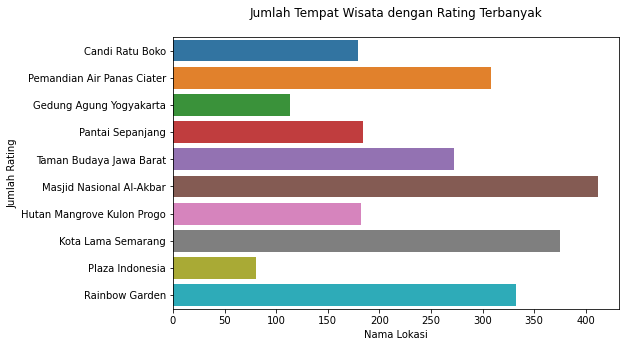

In [22]:
top_10 = tourism_new['id'].value_counts().reset_index()[0:10]
top_10 = pd.merge(top_10,preparation[['Place_Id','Place_Name']], how='left', left_on='index', right_on='Place_Id')

# Membuat visualisasi wisata dengan jumlah rating terbanyak
plt.figure(figsize=(8,5))
sns.barplot('Place_Id', 'Place_Name', data=top_10)
plt.title('Jumlah Tempat Wisata dengan Rating Terbanyak', pad=20)
plt.ylabel('Jumlah Rating')
plt.xlabel('Nama Lokasi')
plt.show()

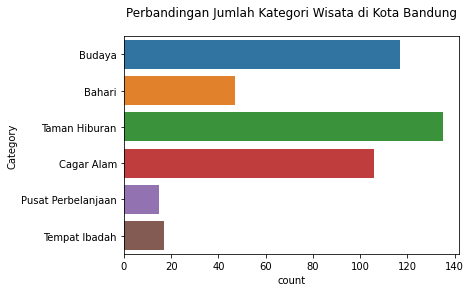

In [23]:
sns.countplot(y='Category', data=preparation)
plt.title('Perbandingan Jumlah Kategori Wisata di Kota Bandung', pad=20)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


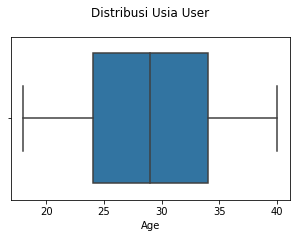

In [24]:
plt.figure(figsize=(5,3))
sns.boxplot(users['Age']);
plt.title('Distribusi Usia User', pad=20)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


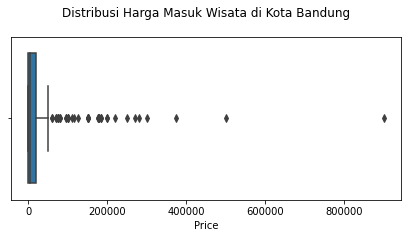

In [25]:
plt.figure(figsize=(7,3))
sns.boxplot(info_tourism['Price'])
plt.title('Distribusi Harga Masuk Wisata di Kota Bandung', pad=20)
plt.show()

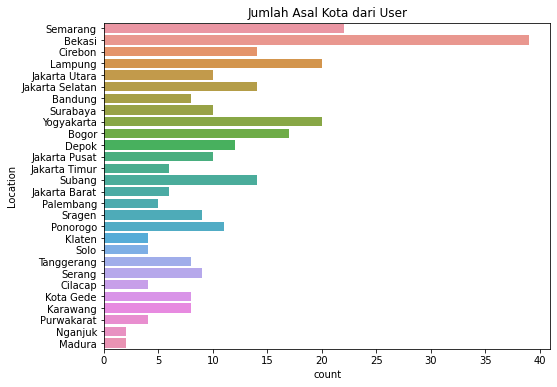

In [26]:
askot = users['Location'].apply(lambda x : x.split(',')[0])

# Visualisasi asal kota dari user
plt.figure(figsize=(8,6))
sns.countplot(y=askot)
plt.title('Jumlah Asal Kota dari User')
plt.show()

#### 

# Content Based Filtering

In [27]:
data = tourism_new
data.sample(5)

,id,name,category,description,city,city_category
149,126,Pantai Goa Cemara,Bahari,Pantai Goa Cemara (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ ꦒꦸꦮ​ ꦕ...,Yogyakarta,Yogyakarta Bahari
158,247,Kiara Artha Park,Taman Hiburan,Kiara Artha Park merupakan sebuah kawasan terp...,Bandung,Bandung Taman Hiburan
28,48,Taman Ismail Marzuki,Budaya,Pusat Kesenian Jakarta Taman Ismail Marzuki ya...,Jakarta,Jakarta Budaya
412,87,Sindu Kusuma Edupark (SKE),Taman Hiburan,Sindu Kusuma Edupark (SKE) merupakan sebuah de...,Yogyakarta,Yogyakarta Taman Hiburan
29,147,Bentara Budaya Yogyakarta (BBY),Budaya,Bentara Budaya Yogyakarta adalah pusat budaya ...,Yogyakarta,Yogyakarta Budaya


## TF-IDF Vectorizer

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

cv.fit(data['city_category'])

print("Features Name: ", list(cv.vocabulary_.keys()))

Features Name:  ['yogyakarta', 'budaya', 'semarang', 'bahari', 'jakarta', 'taman', 'hiburan', 'bandung', 'cagar', 'alam', 'surabaya', 'pusat', 'perbelanjaan', 'tempat', 'ibadah']


In [29]:
cv_matrix = cv.transform(data['city_category']) 
 
cv_matrix.shape 

(437, 15)

In [30]:
cv_matrix.todense()

matrix([[0, 0, 0, ..., 0, 0, 1],
        [0, 1, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 1, 0, 0],
        ...,
        [0, 1, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 1, 0, 1]])

In [31]:
pd.DataFrame(
    cv_matrix.todense(),
    columns=list(cv.vocabulary_.keys()),
    index = data.name
).sample(5)

,yogyakarta,budaya,semarang,bahari,jakarta,taman,hiburan,bandung,cagar,alam,surabaya,pusat,perbelanjaan,tempat,ibadah
name,,,,,,,,,,,,,,,
Bandros City Tour,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
Pantai Ria Kenjeran,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
Pantai Baruna,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
Museum Barli,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
Museum Satria Mandala,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0


## Cosine Similarity

In [32]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(cv_matrix)
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.40824829],
       [0.        , 1.        , 0.        , ..., 0.5       , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.40824829, 0.33333333,
        0.66666667],
       ...,
       [0.        , 0.5       , 0.40824829, ..., 1.        , 0.40824829,
        0.        ],
       [0.        , 0.        , 0.33333333, ..., 0.40824829, 1.        ,
        0.        ],
       [0.40824829, 0.        , 0.66666667, ..., 0.        , 0.        ,
        1.        ]])

In [33]:
cosine_sim_df = pd.DataFrame(cosine_sim,index=data['name'],columns=data['name'])
cosine_sim_df.sample(5,axis=1).sample(10,axis=0)

name,Lawang Sewu,Gedung Sate,Hutan Bambu Keputih,Pantai Jogan,Gereja Katedral
name,,,,,
The Lodge Maribaya,0.000000,0.408248,0.666667,0.000000,0.0
Situs Warungboto,0.000000,0.000000,0.000000,0.408248,0.0
Taman Pandanaran,0.408248,0.000000,0.000000,0.000000,0.0
Jembatan Merah,0.500000,0.500000,0.408248,0.000000,0.0
Kampoeng Rawa,0.408248,0.000000,0.666667,0.000000,0.0
Museum Pos Indonesia,0.500000,1.000000,0.000000,0.000000,0.0
Gua Maria Kerep Ambarawa,0.408248,0.000000,0.666667,0.000000,0.0
Desa Wisata Rumah Domes/Teletubbies,0.000000,0.000000,0.000000,0.408248,0.0
Museum Sonobudoyo Unit I,0.500000,0.500000,0.000000,0.500000,0.0


## Recommendation

In [34]:
def tourism_recommendations(place_name,similarity_data=cosine_sim_df,items=data[['name','category','description','city']],k=5):
    index = similarity_data.loc[:,place_name].to_numpy().argpartition(range(-1,-k,-1))
    
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    
    closest = closest.drop(place_name,errors='ignore')
    
    return pd.DataFrame(closest).merge(items).head(k)

In [35]:
tourism_recommendations("Air Mancur Menari")

,name,category,description,city
0,Taman Prestasi,Taman Hiburan,Taman Prestasi Surabaya merupakan salah satu t...,Surabaya
1,Taman Pelangi,Taman Hiburan,Kalau pelangi biasanya ada di siang hari pasca...,Surabaya
2,Atlantis Land Surabaya,Taman Hiburan,"Sejak diresmikan pada bulan Desember 2017, Atl...",Surabaya
3,Taman Buah Surabaya,Taman Hiburan,Wisata Taman Buah Undaan di Surabaya adalah sa...,Surabaya
4,Taman Keputran,Taman Hiburan,"Ntah, mengapa nama taman ini disebut dengan ta...",Surabaya


In [36]:
tourism_recommendations("Trans Studio Bandung")

,name,category,description,city
0,Puspa Iptek Sundial,Taman Hiburan,Puspa Iptek Sundial adalah wahana pendidikan y...,Bandung
1,Teras Cikapundung BBWS,Taman Hiburan,Teras Cikapundung Bandung sebelumnya merupakan...,Bandung
2,Chingu Cafe Little Seoul,Taman Hiburan,Selain populer karena memiliki pemandangan yan...,Bandung
3,Taman Badak,Taman Hiburan,Taman Badak ini baru saja diresmikan pada tang...,Bandung
4,NuArt Sculpture Park,Taman Hiburan,NuArt Sculpture Park ini merupakan sebuah gall...,Bandung


# Collaborative Filtering

In [37]:
import pandas as pd
import numpy as np 
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

In [38]:
df = tourism_rating
df

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4
...,...,...,...
9995,300,425,2
9996,300,64,4
9997,300,311,3
9998,300,279,4


## Data Preparation

### Encode

In [39]:
user_ids = df.User_Id.unique().tolist()

user_to_user_encoded = {x:i for i, x in enumerate(user_ids)}

user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}

In [40]:
place_ids = df.Place_Id.unique().tolist()

place_to_place_encoded = {x: i for i, x in enumerate(place_ids)}

place_encoded_to_place = {x: i for x, i in enumerate(place_ids)}

In [41]:
df['user'] = df.User_Id.map(user_to_user_encoded)

df['place'] = df.Place_Id.map(place_to_place_encoded)

In [42]:
num_users = len(user_to_user_encoded)

num_place = len(place_encoded_to_place)

df['Place_Ratings'] = df['Place_Ratings'].values.astype(np.float32)

min_rating = min(df['Place_Ratings'])

max_rating= max(df['Place_Ratings'])

print('Number of User: {}, Number of Place: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_place, min_rating, max_rating
))

Number of User: 300, Number of Place: 437, Min Rating: 1.0, Max Rating: 5.0


## Train Test Split

In [43]:
df = df.sample(frac=1,random_state=42)
df

,User_Id,Place_Id,Place_Ratings,user,place
6252,188,207,3.0,187,262
4684,142,268,2.0,141,83
1731,54,103,3.0,53,10
4742,144,119,3.0,143,141
4521,138,288,5.0,137,283
...,...,...,...,...,...
5734,173,402,5.0,172,175
5191,157,85,4.0,156,33
5390,163,18,3.0,162,52
860,28,416,4.0,27,187


In [44]:
x = df[['user','place']].values

y = df['Place_Ratings'].apply(lambda x:(x-min_rating)/(max_rating-min_rating)).values

train_indices = int(0.8 * df.shape[0])

x_train,x_val,y_train,y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x,y)

[[187 262]
 [141  83]
 [ 53  10]
 ...
 [162  52]
 [ 27 187]
 [218   6]] [0.5  0.25 0.5  ... 0.5  0.75 0.25]


## Training

In [45]:
class RecommenderNet(tf.keras.Model):
 
  # Insialisasi fungsi
  def __init__(self, num_users, num_place, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_place = num_place
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding(
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) 
    self.place_embedding = layers.Embedding( 
        num_place,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.place_bias = layers.Embedding(num_place, 1) 
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    place_vector = self.place_embedding(inputs[:, 1]) # memanggil layer embedding 3
    place_bias = self.place_bias(inputs[:, 1]) # memanggil layer embedding 4
 
    dot_user_place = tf.tensordot(user_vector, place_vector, 2) 
 
    x = dot_user_place + user_bias + place_bias
    
    return tf.nn.sigmoid(x) # activation sigmoid

In [46]:
model = RecommenderNet(num_users, num_place, 100)
 
# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [47]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val),
)

Epoch 1/100
1000/1000 [==============================] - 4s 3ms/step - loss: 0.6955 - root_mean_squared_error: 0.3469 - val_loss: 0.6929 - val_root_mean_squared_error: 0.3447
Epoch 2/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6890 - root_mean_squared_error: 0.3421 - val_loss: 0.6931 - val_root_mean_squared_error: 0.3448
Epoch 3/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6815 - root_mean_squared_error: 0.3367 - val_loss: 0.6945 - val_root_mean_squared_error: 0.3457
Epoch 4/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6801 - root_mean_squared_error: 0.3355 - val_loss: 0.6950 - val_root_mean_squared_error: 0.3461
Epoch 5/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6744 - root_mean_squared_error: 0.3315 - val_loss: 0.6949 - val_root_mean_squared_error: 0.3460
Epoch 6/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6721 - root_mean_squared_error: 0.3298 - val_l

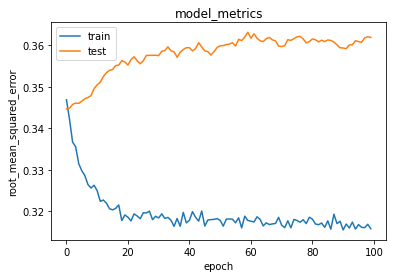

In [48]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Recommendation

In [49]:
place_df = tourism_new
df = pd.read_csv(f'{DATA_PATH}/tourism_rating.csv')

user_id = df.User_Id.sample(1).iloc[0]
place_visited_by_user = df[df.User_Id == user_id]

place_not_visited = place_df[~place_df['id'].isin(place_visited_by_user['Place_Id'].values)]['id'] 
place_not_visited = list(
    set(place_not_visited)
    .intersection(set(place_to_place_encoded.keys()))
)
 
place_not_visited = [[place_to_place_encoded.get(x)] for x in place_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_place_array = np.hstack(
    ([[user_encoder]] * len(place_not_visited), place_not_visited)
)

In [50]:
ratings = model.predict(user_place_array).flatten()
 
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_place_ids = [
    place_encoded_to_place.get(place_not_visited[x][0]) for x in top_ratings_indices
]
 
print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Place with high ratings from user')
print('----' * 8)
 
top_place_user = (
    place_visited_by_user.sort_values(
        by = 'Place_Ratings',
        ascending=False
    )
    .head(5)
    .Place_Id.values
)
 
place_df_rows = place_df[place_df['id'].isin(top_place_user)]
pd.DataFrame(place_df_rows)

Showing recommendations for users: 50
Place with high ratings from user
--------------------------------


,id,name,category,description,city,city_category
12,89,De Mata Museum Jogja,Budaya,Museum De Mata merupakan salah satu museum yan...,Yogyakarta,Yogyakarta Budaya
41,437,Gereja Perawan Maria Tak Berdosa Surabaya,Tempat Ibadah,Gereja Katolik Kelahiran Santa Perawan Maria m...,Surabaya,Surabaya Tempat Ibadah
214,109,Hutan Pinus Pengger,Taman Hiburan,Hutan Pinus Pengger (bahasa Jawa: ꦄꦭꦱ꧀​ꦥꦶꦤꦸꦱ꧀​...,Yogyakarta,Yogyakarta Taman Hiburan
373,401,Taman Keputran,Taman Hiburan,"Ntah, mengapa nama taman ini disebut dengan ta...",Surabaya,Surabaya Taman Hiburan
416,180,Pantai Depok Jogja,Bahari,"Pantai Depok (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ ꦝꦺꦥꦺꦴꦏ꧀, tra...",Yogyakarta,Yogyakarta Bahari


In [51]:
print('----' * 8)
print('Top 10 place recommendation')
print('----' * 8)
 
recommended_place = place_df[place_df['id'].isin(recommended_place_ids)]
recommended_place

--------------------------------
Top 10 place recommendation
--------------------------------


,id,name,category,description,city,city_category
100,309,Observatorium Bosscha,Cagar Alam,Observatorium Bosscha merupakan salah satu tem...,Bandung,Bandung Cagar Alam
106,300,Sanghyang Heuleut,Cagar Alam,Danau yang satu ini memiliki air jernih bernua...,Bandung,Bandung Cagar Alam
206,284,Pasar Baru,Pusat Perbelanjaan,Pasar Baru adalah kawasan perdagangan yang ber...,Bandung,Bandung Pusat Perbelanjaan
236,293,Taman Badak,Taman Hiburan,Taman Badak ini baru saja diresmikan pada tang...,Bandung,Bandung Taman Hiburan
288,308,Pemandian Air Panas Ciater,Cagar Alam,"Di Subang, terdapat kawasan pemandian Air Pana...",Bandung,Bandung Cagar Alam
290,279,Masjid Agung Trans Studio Bandung,Tempat Ibadah,Masjid Agung Trans Studio Bandung (TSB) berdir...,Bandung,Bandung Tempat Ibadah
309,295,Museum Nike Ardilla,Budaya,Museum Nike Ardilla diresmikan atau dibuka unt...,Bandung,Bandung Budaya
379,291,Water Park Bandung Indah,Taman Hiburan,Bandung Indah Waterpark merupakan salah satu k...,Bandung,Bandung Taman Hiburan
385,282,Curug Cilengkrang,Cagar Alam,Curug Cilengkrang bisa menjadi pilihan tujuan ...,Bandung,Bandung Cagar Alam
402,287,Puspa Iptek Sundial,Taman Hiburan,Puspa Iptek Sundial adalah wahana pendidikan y...,Bandung,Bandung Taman Hiburan
